In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

Fitness

In [ ]:
# returns the amount of collisions for a given solution (permutation).
# the maximum amount of collisions that can occur is n(n-1)/2.
# for a 4x4 chessboard, the maximum amount of collisions is 6, corresponding 
# to the situation in which all queens are in the same diagonal.

def fitness_nq(solution):
  f = 0
  n = len(solution)
  for i in range(n):
    for j in range(n):
      if abs(i-j) == abs(solution[i]-solution[j]) and  i != j:
        f=f+1              
  return f/2 

Crossover

In [ ]:
# parents = matrix [parent1 ; parent2] where each parent 
# represents a genotype for the N-Queens Problems
# e.g.: parent1 = [ 1 3 5 2 6 4 7 8 ]

def CutAndCrossfill_Crossover(parents):
  N = len(parents[0])
  offspring = np.zeros((2,N))
  pos = mt.floor(N*np.random.uniform(0,1))   #single point crossover
  offspring[0,:pos] = parents[0,:pos]
  offspring[1,:pos] = parents[1,:pos]
  s1 = pos;
  s2 = pos;
  for i in range(N):
    check1 = -1
    check2 = -1
    for j in range(pos):
      if parents[1,i] == offspring[0,j]:
        check1 = 0
      if parents[0,i] == offspring[1,j]:
        check2 = 0
    if check1 == -1:
      offspring[0,s1] = parents[1,i]
      s1 = s1 + 1
    if check2 == -1:
      offspring[1,s2] = parents[0,i]
      s2 = s2 + 1
  return offspring


Mutação

In [ ]:
def mutation(solution):
  prob = np.random.rand(1)
  if prob >= 0.8:
    return solution

  N = len(solution)
  pos1 = 0
  pos2 = 0
  while pos1 == pos2:
    pos1 = mt.floor(N*np.random.uniform(0,1))
    pos2 = mt.floor(N*np.random.uniform(0,1))
  solution[pos1],solution[pos2] = solution[pos2], solution[pos1]
  return solution


Seleção Pais

In [ ]:
import random

def parent_selection(fit):

  n = len(fit) 
  randomlist = np.random.permutation(n)[:5]
  sol = [0,1]

  for i in randomlist:
    if fit[i] < fit[sol[0]]:
      sol[0] = i
    elif fit[i] < fit[sol[1]]:
      sol[1] = i
  return sol
    

Pior indivíduo

In [ ]:
def wrost_fitness(fit):
  max1 = 0

  for i,j in enumerate(fit):
    if j > fit[max1]:
      max1 = i

  return max1


População inicial

In [ ]:
N = 100;                    # Tamanho da Matriz (N * N) (Rainhas)
NPop = 30;                  # Tamanho da populacao  (30 <= Npop <= 50)
pm = 0.8;                   # Probabilidade de mutacao
Nbest = 5;                  # Numero de individuos escolhidos aleatoriamente
Ncross = 1;                  # Numero de cruzamentos

Pop = np.zeros([NPop, N])
fit = np.zeros(NPop)

for i in range(NPop):
  Pop[i,:] = np.random.permutation(N)
  fit[i] = fitness_nq(Pop[i,:])

Critérios de Parada

In [ ]:
Gen = 1
sort_fit = np.sort(fit)
best_fit_gen = []
mid_fit_gen = []

Execução Algoritmo Genético

In [ ]:
while (50000 >= Gen):

  sort_fit = np.sort(fit)
  best_fit_gen.append(sort_fit[0])
  mid_fit_gen.append(np.median(fit))
  if (sort_fit[0] == 0):
    break
  best = parent_selection(fit)                         
  parents = [Pop[best[0],:], Pop[best[1],:]]
  children = CutAndCrossfill_Crossover(np.array(parents))
  children[0] = mutation(children[0])
  children[1] = mutation(children[1])         
  Pop = np.vstack((Pop,children))
  fit = np.append(fit, fitness_nq(Pop[-2]))
  fit = np.append(fit, fitness_nq(Pop[-1]))

  #delete wrost fitness
  delete = wrost_fitness(fit)
  Pop = np.delete(Pop,delete, 0)
  fit = np.delete(fit,delete, 0)
  delete = wrost_fitness(fit)
  Pop = np.delete(Pop,delete, 0)
  fit = np.delete(fit,delete, 0)

  #update Gen
  Gen = Gen + 1

No handles with labels found to put in legend.


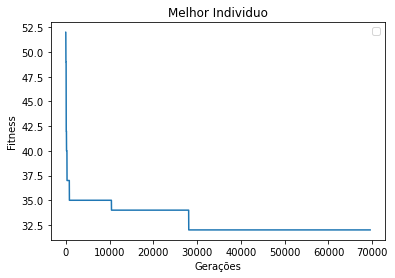

In [ ]:
plt.plot(best_fit_gen)
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Melhor Individuo')
plt.legend()
plt.show()

No handles with labels found to put in legend.


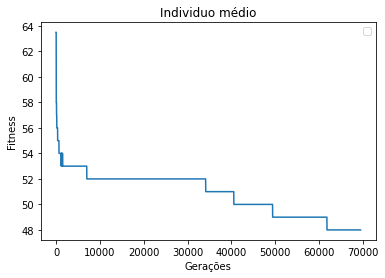

In [ ]:
plt.plot( mid_fit_gen)
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Individuo médio')
plt.legend()
plt.show()

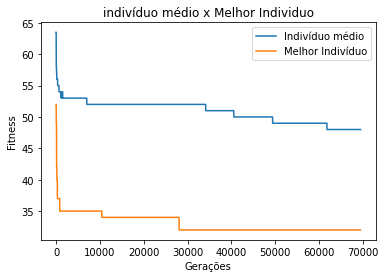

In [ ]:
plt.plot(mid_fit_gen, label = "Indivíduo médio")
plt.plot(best_fit_gen, label = "Melhor Indivíduo")
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('indivíduo médio x Melhor Individuo')
plt.legend()
plt.show()